In [1]:
import random

In [2]:
X = random.sample(range(0, 100000), 1100)

In [3]:
X

[35703,
 40646,
 43985,
 98698,
 76057,
 15534,
 60099,
 43401,
 13302,
 78046,
 32841,
 5708,
 50235,
 3779,
 81540,
 37742,
 11479,
 8153,
 2281,
 47581,
 98183,
 83314,
 29181,
 26459,
 18706,
 38461,
 3575,
 25234,
 31406,
 50188,
 79682,
 94878,
 51825,
 61122,
 69041,
 75105,
 59058,
 78639,
 45627,
 85592,
 44824,
 30622,
 29545,
 64729,
 97863,
 28959,
 81239,
 9042,
 84127,
 17801,
 84167,
 85644,
 37112,
 65708,
 37789,
 72867,
 8614,
 80976,
 80040,
 62276,
 76649,
 78292,
 33628,
 94272,
 50592,
 35256,
 5693,
 89270,
 60537,
 63427,
 99574,
 48967,
 66065,
 76179,
 84063,
 63829,
 15723,
 50568,
 77170,
 76122,
 68268,
 77466,
 80210,
 39052,
 98363,
 53030,
 22650,
 20595,
 96881,
 32114,
 82658,
 35357,
 99375,
 86871,
 99313,
 47599,
 32333,
 63996,
 73586,
 5735,
 61297,
 54710,
 81061,
 95208,
 34214,
 99663,
 90569,
 58681,
 30366,
 20487,
 66689,
 69457,
 27446,
 16906,
 816,
 8150,
 95844,
 36048,
 79679,
 37658,
 73559,
 40507,
 67613,
 28294,
 18304,
 48675,
 321

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array(X)

In [6]:
u = X.mean()
std = X.std()

In [7]:
X = (X - u)/std

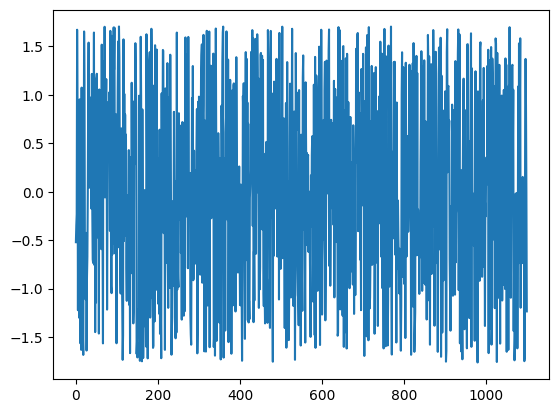

In [65]:
plt.plot(X)
plt.show()

In [9]:
X

array([-0.52095378, -0.34897771, -0.23280775, ...,  0.88839416,
        0.01515371, -1.23477801])

In [10]:
Y = []
for i in X:
    Y.append(2*i + 3)

In [11]:
Y = np.array(Y)

In [12]:
Y

array([1.95809243, 2.30204459, 2.53438451, ..., 4.77678832, 3.03030743,
       0.53044398])

In [13]:
X_train = X[:1000]
X_test = X[1000:]
Y_train = Y[:1000]
Y_test = Y[1000:]

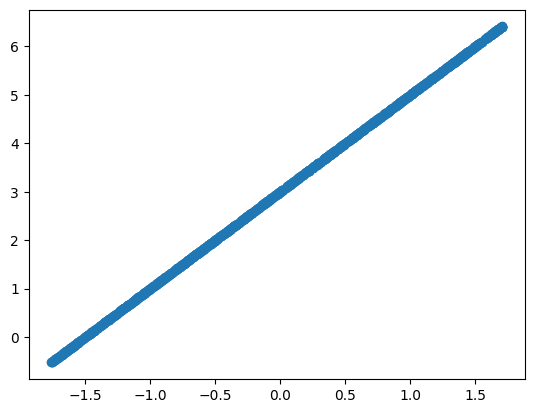

In [66]:
plt.scatter(X_train, Y_train)
plt.show()

In [15]:
def hypothesis(X, theta):
    y = theta[0] + X*theta[1]
    return y

In [16]:
def cost(X, Y, theta):
    error = 0
    
    for i in range(X.shape[0]):
        y_p = hypothesis(X[i], theta)
        
        error += (y_p - Y[i])**2
        
    return error/X.shape[0]

In [17]:
def gradient(X, Y, theta):
    grad = np.zeros((2, ))
    
    for i in range(X.shape[0]):
        y_p = hypothesis(X[i], theta)
        
        grad[0] += (y_p - Y[i])*1
        grad[1] += (y_p - Y[i])*X[i]
        
    return grad/X.shape[0]

In [18]:
def gradient_descent(X, Y):
    theta = np.zeros((2, ))
    
    max_epochs = 1000
    epoch_loss = []
    lr = 0.03
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        
        loss = cost(X, Y, theta)
        epoch_loss.append(loss)
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
    return theta, epoch_loss

In [19]:
theta, cost_list = gradient_descent(X_train, Y_train)

In [20]:
cost_list

[13.002575938811514,
 12.23396852634413,
 11.510795290968991,
 10.83037049453779,
 10.190167161262913,
 9.587807692717412,
 9.021055037618849,
 8.48780438360114,
 7.986075340118107,
 7.514004583445003,
 7.069838936462382,
 6.651928857519751,
 6.258722314197058,
 5.888759019210856,
 5.5406650070574655,
 5.213147531250677,
 4.904990263202347,
 4.615048774914648,
 4.342246288706594,
 4.085569678189479,
 3.8440657056388785,
 3.616837481788902,
 3.4030411349003793,
 3.2018826767320605,
 3.0126150537751197,
 2.834535372799279,
 2.666982290406375,
 2.509333556896276,
 2.3610037053231268,
 2.221441877159196,
 2.090129776490914,
 1.9665797451491875,
 1.8503329516249531,
 1.7409576870438759,
 1.638047761871415,
 1.5412209973938085,
 1.4501178063723685,
 1.3643998575997804,
 1.2837488193986355,
 1.2078651773956584,
 1.136467122180926,
 1.0692895027209457,
 1.006082841638637,
 0.9466124087030741,
 0.8906573490880034,
 0.8380098631615659,
 0.7884744347610446,
 0.7418671050865386,
 0.698014789516865

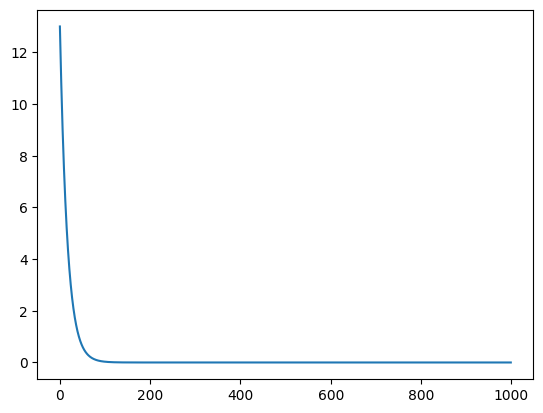

In [67]:
import matplotlib.pyplot as plt
plt.plot(cost_list)
plt.show()

In [22]:
theta

array([3., 2.])

In [23]:
def r2_score(y_t, y_p):
    
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_p.mean())**2)
    
    return (1 - num/den)

In [24]:
y_p = []
for i in X_test:
    pred = hypothesis(i, theta)
    y_p.append(pred)

In [27]:
print(r2_score(Y_test, np.array(y_p)))

1.0


In [28]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 2, 3, 4])

In [29]:
x, y = np.meshgrid(x, y)

In [30]:
print(x.shape, y.shape)

(4, 6) (4, 6)


In [61]:
print(x, y)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 6]] [[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]]


In [34]:
import matplotlib.pyplot as plt

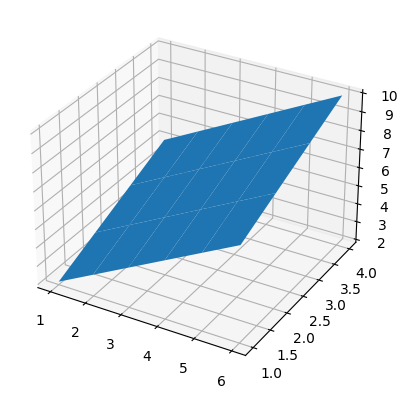

In [64]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(x, y, x+y)
plt.show()

In [43]:
def gradient_descent(X, Y):
    theta = np.zeros((2, ))
    
    max_epochs = 1000
    epoch_loss = []
    theta_traversal = []
    lr = 0.03
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        
        loss = cost(X, Y, theta)
        epoch_loss.append(loss)
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
        theta_traversal.append([theta[0], theta[1]])
        
    return theta, epoch_loss, theta_traversal

In [44]:
theta, cost_list, theta_list = gradient_descent(X_train, Y_train)

In [45]:
E0 = np.arange(-50, 50)
E1 = np.arange(-50, 50)

In [47]:
E0, E1 = np.meshgrid(E0, E1)

In [48]:
E0.shape

(100, 100)

In [50]:
J = np.zeros((100, 100))

In [56]:
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        preds = E0[i, j] + E1[i, j]*X_test
        J[i, j] = (np.sum((Y_test - preds)**2))/preds.shape[0]

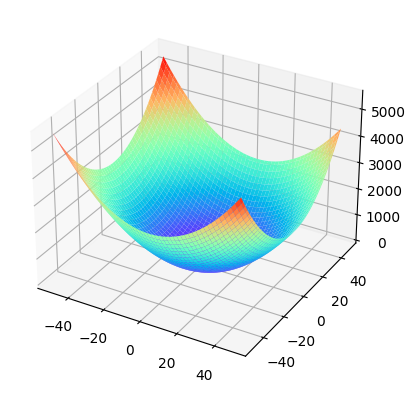

In [63]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(E0, E1, J, cmap = 'rainbow')
plt.show()